In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sp_linalg

## Q1_p2

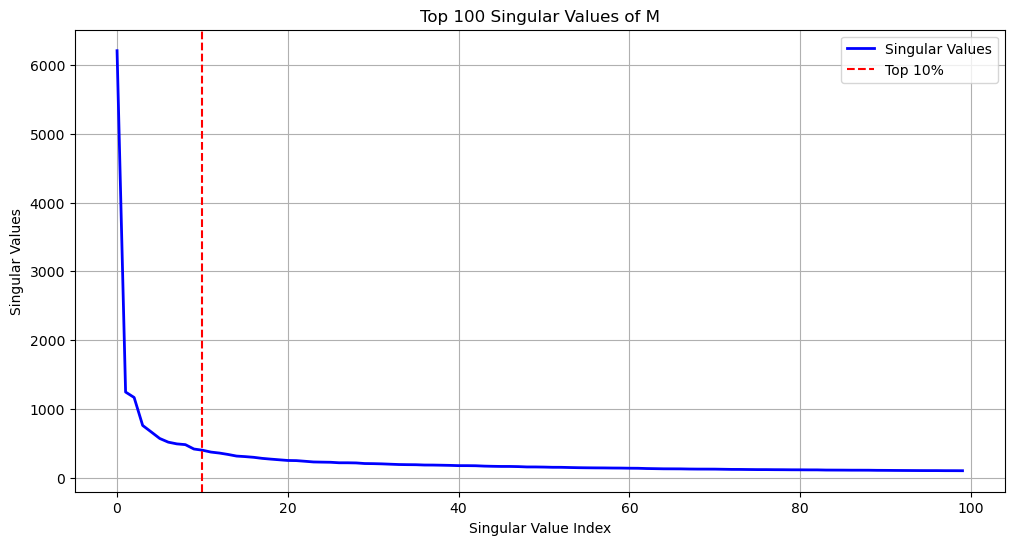

In [49]:
file_name = "co_occur.csv"
df = pd.read_csv(file_name, header=None)
M = df.to_numpy()
M_w = np.log10(M + 1) # normalized co-occurrence matrix M

U, s, Vt = sp_linalg.svds(M_w, k=100)
s = s[::-1] # reverse the order of singular values

plt.figure(figsize=(12,6))
plt.plot(s, 'b-', linewidth=2, label='Singular Values')
critical_index = int(0.1 * len(s))
plt.axvline(critical_index, color='r', linestyle='--', label='Top 10%')

plt.xlabel('Singular Value Index')
plt.ylabel('Singular Values')
plt.title('Top 100 Singular Values of M')
plt.legend()
plt.grid()
plt.show()


### Dose normalized M seems to be close to a lower rank matrix?
- Yes, Its singular values decay rapidly, with the top 20 singular values dominating.
- Visually, the log-scale singular value plot shows a sharp drop.

\newpage

## Q1_p3

In [50]:
# Load the dictionary file
with open('dictionary.txt', 'r') as f:
    words = f.read().splitlines()

In [51]:
vec = [3,4,15,24,36] # five interpretable vectors
for i in vec:
    ui = U[:,i]
    index = np.argsort(ui)
    print(i)
    print("largest: ", words[index[-1]])
    print("second largest: ", words[index[-2]])
    print("third largest: ", words[index[-3]])
    print("forth largest: ", words[index[-4]])
    print("fifth largest: ", words[index[-5]])
    print("sixth largest: ", words[index[-6]])
    print("seventh largest: ", words[index[-7]])
    print("eighth largest: ", words[index[-8]])
    print("ninth largest: ", words[index[-9]])
    print("tenth largest: ", words[index[-10]])
    print("-----------------------------------")
    print("smallest: ", words[index[0]])
    print("second smallest: ", words[index[1]])
    print("third smallest: ", words[index[2]])
    print("forth smallest: ", words[index[3]])
    print("fifth smallest: ", words[index[4]])
    print("sixth smallest: ", words[index[5]])
    print("seventh smallest: ", words[index[6]])
    print("eighth smallest: ", words[index[7]])
    print("ninth smallest: ", words[index[8]])
    print("tenth smallest: ", words[index[9]])
    print()

3
largest:  five
second largest:  several
third largest:  six
forth largest:  four
fifth largest:  were
sixth largest:  seven
seventh largest:  eight
eighth largest:  three
ninth largest:  been
tenth largest:  numerous
-----------------------------------
smallest:  which
second smallest:  where
third smallest:  who
forth smallest:  whom
fifth smallest:  that
sixth smallest:  gain
seventh smallest:  under
eighth smallest:  taking
ninth smallest:  here
tenth smallest:  receiving

4
largest:  french
second largest:  quebec
third largest:  du
forth largest:  montreal
fifth largest:  le
sixth largest:  battalion
seventh largest:  fort
eighth largest:  la
ninth largest:  regiment
tenth largest:  pierre
-----------------------------------
smallest:  pp
second smallest:  hit
third smallest:  vol
forth smallest:  orthodox
fifth smallest:  ed
sixth smallest:  pitcher
seventh smallest:  hits
eighth smallest:  eds
ninth smallest:  isbn
tenth smallest:  christian

15
largest:  been
second largest: 

### Interpretation
- Dimension 3 separates quantity-related words (e.g., five, six, several) from syntactic function words (e.g., which, where, under, here).

- Dimension 4 separates publishing/abbreviation-related terms (e.g., pp, vol, isbn) from French-associated words (e.g., french, du, le, la, montreal).

- Dimension 15 separates spatial prepositions (e.g., near, within, in) from verbs in different tenses (e.g., been, are, got, get).

- Dimension 24 separates political/government-related terms (e.g., government, political, law) from geographical terms (e.g., river, north, island).

- Dimension 36 separates entertainment-related vocabulary (e.g., album, film, tv, song) from social role-related words (e.g., people, president, student).

### Why not all singular vectors are easy to interpret?
- Some singular vectors may capture not immediately intuitive semantic information, but rather more complex syntactic relationships or latent connections between different languages, such as certain vocabulary associations between French and English.

- Furthermore, SVD requires singular vectors to be mutually orthogonal, which causes some singular vectors to describe more abstract dimensions, the patterns that computers can identify mathematically but which humans cannot intuitively comprehend. 

\newpage

## Q1_p4_a

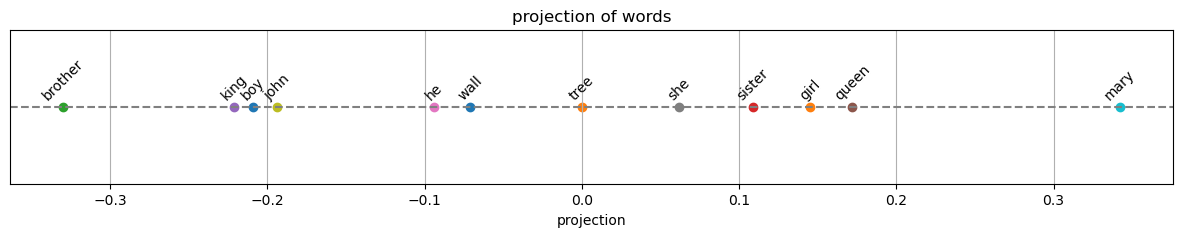

In [52]:
rows_norm = np.linalg.norm(U,axis=1,keepdims=True)
U_normalized = U / rows_norm # normalize the rows of U

# man: 236 woman: 783
V1 = U_normalized[783]
V2 = U_normalized[236]
V = V1 - V2
V = V / np.linalg.norm(V)

w = {
    'boy':1121,
    'girl':996,
    'brother':614,
    'sister':1088,
    'king':240,
    'queen':814,
    'he':12,
    'she':42,
    'john':128,
    'mary':788,
    'wall':1273,
    'tree':1403
}

projection = {}
for word,index in w.items():
    projection[word] = np.dot(V,U_normalized[index])
    projection[word] = round(projection[word],3)

plt.figure(figsize=(15, 2))
plt.axhline(0, color='gray', linestyle='--') 
for word, proj in projection.items():
    plt.scatter(proj, 0)
    plt.text(proj, 0.005, word, ha='center', rotation=45)  

plt.title("projection of words")
plt.xlabel("projection")
plt.yticks([]) 
plt.grid(True, axis='x')
plt.show()
 

### Interpretation
- Words related to the male gender (such as boy, brother, king) are distributed on the left side of the zero value
- While words related to the female gender (such as queen, sister) are distributed on the right side of the zero value.
- This is because $V = V_1(woman) - V_2(man)$, here "man" is given a negative value on V, while "woman" is given a positive value on V.
- Neutral words like "tree" are exactly at the zero value.

\newpage

## q1_p4_b

In [53]:
from sklearn.decomposition import PCA

def hard_de_bias(Ui):
    gender_pair = [(236,783),(1121,996),(614,1088),(240,814),(12,42),(128,788),(16,40),(331,562)]
    difference = []
    for w1,w2 in gender_pair:
        difference.append(U_normalized[w1] - U_normalized[w2])

    difference = np.array(difference)
    pca = PCA(n_components=1)
    pca.fit(difference)
    G = pca.components_[0].T

    return Ui - G.dot(G.T.dot(Ui))

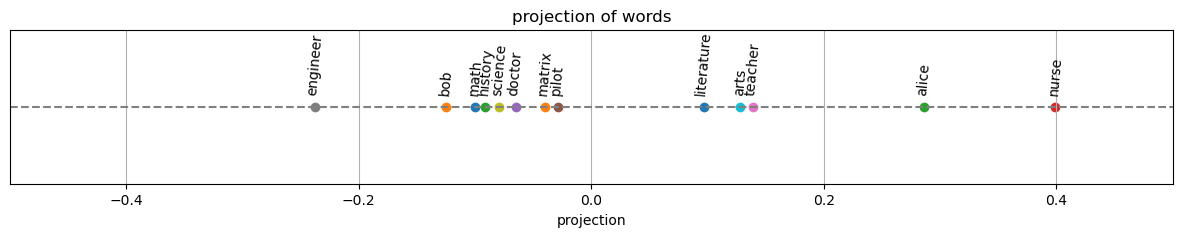

In [54]:
def project_words(de_bias):
    #math, matrix, history, nurse, doctor, pilot, teacher, engineer, science, arts, literature, bob, alice
    w_2 = {
        'math': 5304,
        'matrix': 4361,
        'history': 98,
        'nurse': 5777,
        'doctor': 1361,
        'pilot': 1713,
        'teacher': 1569,
        'engineer': 1668,
        'science': 406,
        'arts': 533,
        'literature': 1120,
        'bob': 1401,
        'alice': 3397
    }

    projection_2 = {}
    for word, index in w_2.items():
        if de_bias:
            current = hard_de_bias(U_normalized[index])
        else:
            current = U_normalized[index]
        projection_2[word] = np.dot(V, current)
        projection_2[word] = round(projection_2[word], 3)

    plt.figure(figsize=(15, 2))
    plt.axhline(0, color='gray', linestyle='--')  
    for word, proj in projection_2.items():
        plt.scatter(proj, 0)
        plt.text(proj, 0.01, word, ha='center', rotation=85) 

    plt.xlim(-0.5, 0.5)
    plt.title("projection of words")
    plt.xlabel("projection")
    plt.yticks([])
    plt.grid(True, axis='x')
    plt.show()

project_words(de_bias = False)

### Interpretation
- From the above figure, it can be seen that some occupations or disciplines have gender differences.
- For example, engineers and mathematics have negative projections in V, indicating a preference for male gender. 
- On the contrary, teachers and nurses have positive projections in V, indicating a preference of female gender. 
- The reason for this difference may be that the training data, i.e., the corpus, inherently contains these differences. For example, engineers may more often refer to men in the original corpus, while nurses more often refer to women. 
- This phenomenon may lead to bias issues, such as when searching for "engineers" on LinkedIn, the results will be more inclined to men rather than women, which causes gender-based bias.

\newpage


## Q1_p4_c

### Propose one method of mitigating the problem discussed in the previous part

1. Define Gender Subspace
   - Use seed gender pairs e.g., he-she, man-woman, to compute difference vectors.
   - Perform PCA on these vectors to identify the primary gender directions G.
2. Neutralize Non-Gendered Words
   - For words that should be gender-neutral e.g., "doctor", "engineer", remove their projection onto G
3. Equalize Explicitly Gendered Pairs
   - For gendered word pairs, e.g., actor-actress, waiter-waitress:
   - Center their embeddings and rescale their non-gender components symmetrically

### We try step 1 and step 2 of above method

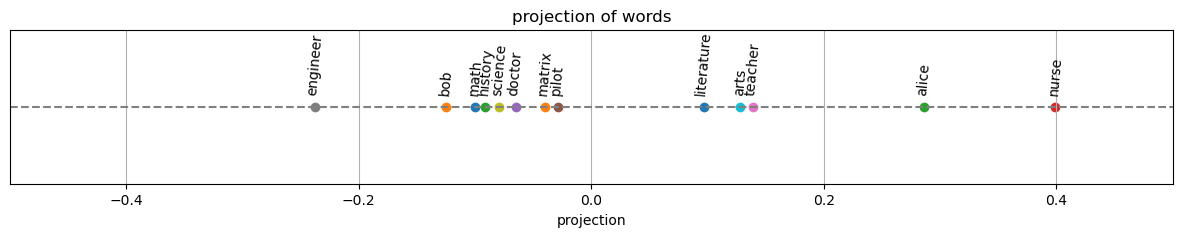

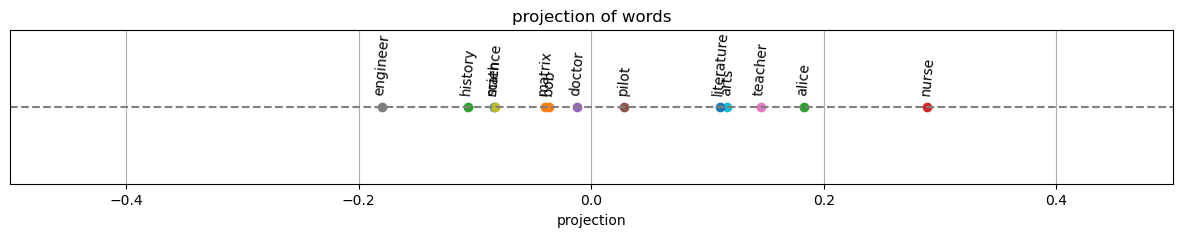

In [55]:
project_words(de_bias = False)
project_words(de_bias = True)

#### Interpretation
- The implementation above is just a super simplified version.
- It only considers the first 2 steps of the method, and the seed gender pair contains only 8 pairs.
- But we can see some words like engineer and nurse are now more neutral(closer to 0) than before.
- This means the methods works.
- Of course, the full version of the method is much more useful.

\newpage

## Q1_p5_a

In [56]:
def find_closest_by_vec(vec,omit):
    # vec: the vector to find the closest words for
    # omit: the indices of words to omit from the search
    sim=[]
    for i in range(10000):
        if i in omit:
            sim.append(0)
            continue
        sim.append(np.dot(vec,U_normalized[i]))

    sim = np.array(sim)
    index = np.argsort(sim)
    return index

index_montreal = 2207
find_vec = U_normalized[index_montreal]
omit = [index_montreal]
print(f"most similar words to {words[index_montreal]}:")
index = find_closest_by_vec(find_vec,omit)
for i in range(1):
    print(f"{words[index[-(i+1)]]}")




most similar words to montreal:
vancouver


\newpage

## Q1_p5_b

In [57]:
# Load the analogy task data
test=[]
with open("analogy_task.txt",'r') as f:
    for line in f:
        test.append(line.strip().split(" "))

# Create a dictionary to map words to their indices
dict_words={}
for i in range(len(words)):
    current_word = words[i]
    dict_words[current_word] = i 

In [58]:
over_5=[]
def test_analogy(test):    
    correct = 0
    for i in test:
        omit = []
        for j in range(3):
            omit.append(dict_words[i[j]])
        ans = i[3]
        v_diff = U_normalized[dict_words[i[1]]] - U_normalized[dict_words[i[0]]] + U_normalized[dict_words[i[2]]]
        v_diff = v_diff/np.linalg.norm(v_diff)
        index = find_closest_by_vec(v_diff,omit)

        if words[index[-1]] == ans:
            correct+=1
            continue

        # if the answer is not in the top 5 results, we treat it as a "difficult" task
        difficult = True
        for k in range(5):
            if words[index[-(k+1)]] == ans:
                difficult = False
                break
        if difficult:
            over_5.append(i)
    print("Number of correct answers: ", correct)
    print("accuracy: ", correct/len(test))

test_analogy(test)

Number of correct answers:  3071
accuracy:  0.5498657117278425


In [59]:
def test_difficult_task(test):
    print(f'{test[1]} - {test[0]} + {test[2]} = ? (current answer: {test[3]})')
    omit = []
    for i in range(3):
        omit.append(dict_words[test[i]])

    vec_diff = U_normalized[dict_words[test[1]]] - U_normalized[dict_words[test[0]]] + U_normalized[dict_words[test[2]]]
    vec_diff = vec_diff/np.linalg.norm(vec_diff)

    index = find_closest_by_vec(vec_diff,omit)
    for j in range(10):
        print(f"{j+1} {words[index[-(j+1)]]}")
    

In [60]:
test_difficult_task(over_5[40])

jamaica - kingston + ottawa = ? (current answer: canada)
1 haiti
2 kenya
3 guinea
4 uganda
5 congo
6 nigeria
7 tanzania
8 morocco
9 madagascar
10 cuba


- The difficulty of the above task may be attributed to the fact that "Kingston" refers to place names in multiple locations. 
- For example, it is both the capital of Jamaica and a city in Canada. As a result, when "Ottawa" and "Kingston" appear together, the outcome may not align with our expected "country-capital" relationship; it could also include other information, such as cities within the same country, making the prediction for this task more challenging.

In [61]:
test_difficult_task(over_5[60])

euro - europe + usa = ? (current answer: dollar)
1 usd
2 vs
3 winner
4 pts
5 savings
6 dollars
7 loans
8 semifinals
9 runner
10 medalists


- The difficulty of this task lies in the fact that "USA" is an abbreviation, while the other three items are written in full. 
- Therefore, when considering "+ USA," the model may also take into account the influence of "abbreviations" on the answer. 
- As a result, the model might mistakenly interpret the abbreviated form "USD" as the correct answer.

In [62]:
test_difficult_task(over_5[300])

washington - seattle + pittsburgh = ? (current answer: pennsylvania)
1 kansas
2 michigan
3 cleveland
4 baltimore
5 minnesota
6 ohio
7 chicago
8 indiana
9 syracuse
10 iowa


- The difficulty of this task lies in the fact that the term "Washington" has multiple meanings; it can refer to the U.S. capital, Washington, D.C., or it can denote Washington State. 
- Therefore, in this case predicting the "state-city" relationship can become challenging.

\newpage

## Q1_p5_c
- We can improve the accuracy by simply increase the value of k.
- The lower rank-k approximation of the matrix loses the information from $k^{th}$ to $r^{th}$ singular value
- Hence, higher k can capture more information and lead to better accuracy

In [66]:
def improved_find_closest_by_vec(vec,omit):

    sim=[]
    for i in range(10000):
        if i in omit:
            sim.append(0)
            continue
        sim.append(np.dot(vec,U_normalized_200[i]))

    sim = np.array(sim)
    index = np.argsort(sim)
    return index

def improved_test_analogy(test):    
    correct = 0
    for i in test:
        omit = []
        for j in range(3):
            omit.append(dict_words[i[j]])
        ans = i[3]
        v_diff = U_normalized_200[dict_words[i[1]]] - U_normalized_200[dict_words[i[0]]] + U_normalized_200[dict_words[i[2]]]
        v_diff = v_diff/np.linalg.norm(v_diff)
        index = improved_find_closest_by_vec(v_diff,omit)

        if words[index[-1]] == ans:
            correct+=1
            continue

    print("Number of correct answers: ", correct)
    print("accuracy: ", correct/len(test))

U_200, s_200, Vt_200 = sp_linalg.svds(M_w, k=200)
U_normalized_200 = U_200 / np.linalg.norm(U_200, axis=1, keepdims=True) # normalize the rows of U
improved_test_analogy(test)



Number of correct answers:  3358
accuracy:  0.601253357206804
